In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing, model_selection

from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv("data/parenting_dataset_asli.csv", index_col="NO")
df.drop(columns=["Responden"], inplace=True)
df.head()

,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,...,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10,Parenting_style
NO,,,,,,,,,,,,,,,,,,,,,
1,1,5,2,5,1,4,1,4,1,5,...,4,3,1,4,1,2,4,1,1,Authoration
2,1,4,2,4,2,5,1,4,5,5,...,2,3,2,3,4,3,2,2,1,Authorative
3,2,4,4,5,5,4,2,5,5,5,...,4,3,4,4,4,4,4,3,3,Authorative
4,1,3,2,4,2,4,1,3,2,5,...,5,2,4,3,3,3,5,5,4,Permissive
5,1,1,3,3,1,1,1,5,3,3,...,5,1,4,3,4,3,4,4,3,Permissive


In [ ]:
df.Parenting_style.value_counts()

Authorative    182
Authoration    163
Permissive     155
Name: Parenting_style, dtype: int64

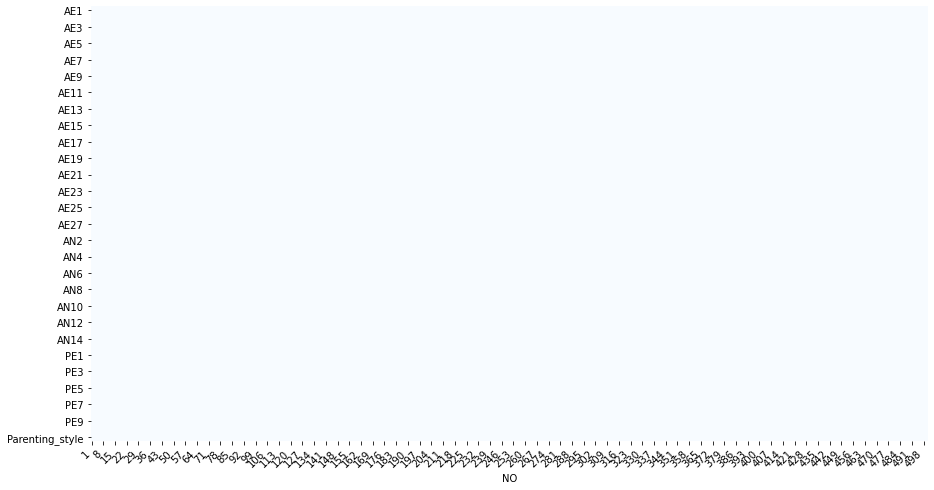

In [ ]:
plot_missing_value(df) #cek data bolong / missing value

In [ ]:
X = df.drop(['Parenting_style'], axis = 1) #data target atau label nya adalah clas yaitu curang atau tidak curang
X = np.array(X)
y = df['Parenting_style']

In [ ]:
df = shuffle(df)

i = 8
df_to_predict = df[:i].reset_index(drop = True)
predict_ps = df_to_predict.Parenting_style 
predict_ps = np.array(predict_ps)
prediction = np.array(df_to_predict.drop(['Parenting_style'],axis= 1))

df = df[i:].reset_index(drop = True)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [ ]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
train_x

array([[1, 5, 3, ..., 4, 4, 4],
       [4, 2, 3, ..., 5, 1, 5],
       [2, 2, 4, ..., 4, 4, 4],
       ...,
       [3, 2, 2, ..., 5, 3, 4],
       [1, 5, 4, ..., 3, 4, 4],
       [3, 3, 3, ..., 5, 4, 4]], dtype=int64)

In [ ]:
input_dim = len(df.columns) - 1

model = Sequential()
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_x, train_y, epochs = 200, batch_size = 5)

scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 1.0704 - accuracy: 0.5175
Epoch 2/200
80/80 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.7500
Epoch 3/200
80/80 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7750
Epoch 4/200
80/80 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7925
Epoch 5/200
80/80 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.8125
Epoch 6/200
80/80 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8375
Epoch 7/200
80/80 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8600
Epoch 8/200
80/80 [==============================] - 0s 4ms/step - loss: 0.2575 - accuracy: 0.8900
Epoch 9/200
80/80 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8825
Epoch 10/200
80/80 [==============================] - 0s 4ms/step - loss: 0.1862 - accuracy: 0.9425
Epoch 11/

80/80 [==============================] - 0s 4ms/step - loss: 6.6288e-05 - accuracy: 1.0000
Epoch 82/200
80/80 [==============================] - 0s 4ms/step - loss: 6.2378e-05 - accuracy: 1.0000
Epoch 83/200
80/80 [==============================] - 0s 4ms/step - loss: 6.0848e-05 - accuracy: 1.0000
Epoch 84/200
80/80 [==============================] - 0s 4ms/step - loss: 5.6448e-05 - accuracy: 1.0000
Epoch 85/200
80/80 [==============================] - 0s 4ms/step - loss: 5.2911e-05 - accuracy: 1.0000
Epoch 86/200
80/80 [==============================] - 0s 3ms/step - loss: 5.4447e-05 - accuracy: 1.0000
Epoch 87/200
80/80 [==============================] - 0s 4ms/step - loss: 4.7553e-05 - accuracy: 1.0000
Epoch 88/200
80/80 [==============================] - 0s 4ms/step - loss: 4.3134e-05 - accuracy: 1.0000
Epoch 89/200
80/80 [==============================] - 0s 4ms/step - loss: 4.0913e-05 - accuracy: 1.0000
Epoch 90/200
80/80 [==============================] - 0s 3ms/step - loss: 3.9

80/80 [==============================] - 0s 4ms/step - loss: 1.0067e-06 - accuracy: 1.0000
Epoch 159/200
80/80 [==============================] - 0s 4ms/step - loss: 9.4145e-07 - accuracy: 1.0000
Epoch 160/200
80/80 [==============================] - 0s 3ms/step - loss: 9.1940e-07 - accuracy: 1.0000
Epoch 161/200
80/80 [==============================] - 0s 3ms/step - loss: 8.6099e-07 - accuracy: 1.0000
Epoch 162/200
80/80 [==============================] - 0s 3ms/step - loss: 7.8529e-07 - accuracy: 1.0000
Epoch 163/200
80/80 [==============================] - 0s 3ms/step - loss: 7.4982e-07 - accuracy: 1.0000
Epoch 164/200
80/80 [==============================] - 0s 3ms/step - loss: 7.3135e-07 - accuracy: 1.0000
Epoch 165/200
80/80 [==============================] - 0s 3ms/step - loss: 6.9737e-07 - accuracy: 1.0000
Epoch 166/200
80/80 [==============================] - 0s 3ms/step - loss: 6.4373e-07 - accuracy: 1.0000
Epoch 167/200
80/80 [==============================] - 0s 3ms/step - 

In [ ]:
from jcopml.plot import plot_confusion_matrix

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

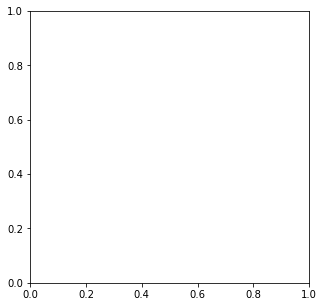

In [ ]:
plot_confusion_matrix(train_x, test_x, train_y, test_y, model)